In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
us = pd.read_excel('median_income_region.xlsx', header=(7,8)).head(2)
northeast = pd.read_excel('median_income_region.xlsx', 'Northeast', header=(1,2))
midwest = pd.read_excel('median_income_region.xlsx', 'Midwest', header=(1,2))
south = pd.read_excel('median_income_region.xlsx', 'South', header=(1,2)).head(2)
west = pd.read_excel('median_income_region.xlsx', 'West', header=(1,2)).head(2)

In [3]:
median_2020 = []

median_2020.append(us['Median income']['2020\ndollars'][0])
median_2020.append(northeast['Median income']['2020\ndollars'][0])
median_2020.append(midwest['Median income']['2020\ndollars'][0])
median_2020.append(south['Median income']['2020\ndollars'][0])
median_2020.append(west['Median income']['2020\ndollars'][0])

median_2020

[67521, 75211, 66968, 61243, 74951]

In [4]:
median_income_region = pd.DataFrame()

regions = ['United States', 'Northeast', 'Midwest', 'South', 'West']

median_income_region['Regions'] = regions
median_income_region['Median Income 2020 (2020 Dollars)'] = median_2020

In [5]:
median_income_region

,Regions,Median Income 2020 (2020 Dollars)
0,United States,67521
1,Northeast,75211
2,Midwest,66968
3,South,61243
4,West,74951


<function matplotlib.pyplot.show(close=None, block=None)>

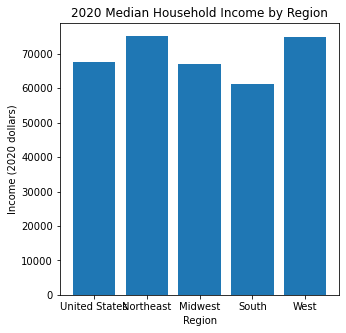

In [20]:
plt.figure(figsize=(5, 5))
plt.bar(regions, median_2020)
plt.title('2020 Median Household Income by Region')
plt.xlabel('Region')
plt.ylabel('Income (2020 dollars)')
plt.show

In [7]:
state_median = pd.read_excel('median_income_state.xlsx', header=(62,63))

In [8]:
state_median.head(1)

State          2020                         2019  \
  Unnamed: 0_level_1 Median income Standard error Median income   
0      United States         67521            475         69560   

                          2018                    2017 (40)                 \
  Standard error Median income Standard error Median income Standard error   
0            557         65127            433         64557            340   

           2017  ...          1988                    1987 (21)  \
  Median income  ... Median income Standard error Median income   
0         64806  ...         57433            293         56964   

                          1986                    1985 (20)                 \
  Standard error Median income Standard error Median income Standard error   
0            278         56291            292         54334            294   

      1984 (19)                 
  Median income Standard error  
0         53337            243  

[1 rows x 79 columns]

In [10]:
headers = []
drop = []

for year in range(1984, 2021):
    headers.append(year)
    
for header in state_median:
    if type(header[0]) == str and header[0] != 'State':
        new_header = int(header[0][:4])
        
        if new_header in headers:
            drop.append(header)
            state_median.drop([header], axis=1, inplace=True)
        else:
            state_median.rename(columns={header[0] : new_header}, inplace=True)

In [11]:
state_median.head()

State          2020                         2019  \
  Unnamed: 0_level_1 Median income Standard error Median income   
0      United States         67521            475         69560   
1            Alabama         54393           2587         56901   
2             Alaska         74476           3570         79373   
3            Arizona         66628           3534         71556   
4           Arkansas         50540           1992         55220   

                          2018                         2017                 \
  Standard error Median income Standard error Median income Standard error   
0            557         65127            433         64806            354   
1           2544         51475           2498         53973            892   
2           6769         70853           3495         76273           2871   
3           3433         64203           2362         64545           2790   
4           2414         51316           2173         51561           2790   

           2016  ...          1991                         1990  \
  Median income  ... Median income Standard error Median income   
0         63683  ...         55992            268         57677   
1         50936  ...         45250           1985         44991   
2         81680  ...         75482           3386         75697   
3         61592  ...         57128           1667         56292   
4         49518  ...         43556           1455         43891   

                          1989                         1988                 \
  Standard error Median income Standard error Median income Standard error   
0            295         58425            321         57433            293   
1           1997         43019           2163         42082           1924   
2           3134         72776           2785         69833           2496   
3           2198         57710           2446         55767           1778   
4           1890         43321           1849         42554           1489   

           1986                 
  Median income Standard error  
0         56291            292  
1         43257           2001  
2         70895           2299  
3         57655           1623  
4         42348           1730  

[5 rows x 49 columns]

In [19]:
for state in state_median['State']['Unnamed: 0_level_1']:
    if state != 'United States':
        print(state)

Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming
